# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar de exame, você deve fazer um "upload" do notebook no _moodle_</font>.

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.

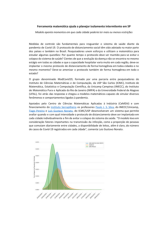

In [2]:
from pdf2image import convert_from_path 
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline

def save_page(file_full_path: str, img_base_name: str = '', dir_name: str = '')->None:
    images = convert_from_path(file_full_path)
    if (img_base_name == ''):
        img_base_name = os.path.basename(file_full_path).split('.')[0]
    if (dir_name != ''):
        if (not os.path.isdir(dir_name)):
            os.mkdir(dir_name)
    for i, pagina in enumerate(images):
        full_page_path = os.path.join(dir_name, f'{img_base_name}_{i}.png')
        pagina.save(full_page_path, 'PNG')
        im = Image.open(full_page_path)
        plt.axis('off')
        plt.imshow(im)
        plt.show()

png_dir = 'pdf_pages'
save_page(file_full_path='modcovid.pdf', dir_name=png_dir)

In [3]:
import glob
import pytesseract as ocr

png_files = glob.glob(f'{png_dir}/*.png', recursive=True)
text = ''
for filename in png_files:
    t = ocr.image_to_string(Image.open(filename), lang='por')
    text += t
print(text)

Ferramenta matemática ajuda a planejar isolamento intermitente em SP

Modelo aponta momentos em que cada cidade poderia ter mais ou menos restrições

Medidas de controle são fundamentais para resguardar o sistema de saúde diante da
pandemia de Covid-19. O protocolo de distanciamento social têm sido adotado na maior parte
dos países e também no Brasil. Pesquisadores unem esforços e utilizam a matemática para
estudar algumas questões: Por quanto tempo o protocolo deve ser mantido para se evitar o
colapso do sistema de saúde? Cientes de que a evolução da doença não se encontra no mesmo
estágio em todas as cidades e que a capacidade hospitalar varia muito em cada região, deve-se
implantar o mesmo protocolo de distanciamento de forma homogênea em todas cidades e no
mesmo momento? Deve-se amenizar o protocolo também de forma homogênea em todo o
estado?

O grupo denominado ModCovid19, formado por uma parceria entre pesquisadores do
Instituto de Ciências Matemáticas e de Computação, da USP São

### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>).
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

def get_file_contents(fname: str) -> str:
    with open(fname,'r') as f:
            return f.read()

def get_words(words_in: str) -> list:
    words = nltk.word_tokenize(words_in)
    return [w.lower() for w in words if w.isalpha()]

words = get_words(get_file_contents('modcovid.txt'))
num_single_char_words = len([w for w in words if len(w) == 1])
print(f'Existem {num_single_char_words} palavras com 1 letra')

Existem 60 palavras com 1 letra


---
### Questão 3 (2.5 pontos)

Carregue o arquivo `artists_mba21.csv` e armazene em um pandas DataFrame.

Esse arquivo possui os atributos:
 * name: nome do artista
 * years: anos de nascimento e morte
 * genre: gênero(s) a que pertencem suas obras
 * nationality: nacionalidades
 * bio: biografia
 * wikipedia: link para a Wikipedia do artista
 * paintings: número de obras (pinturas)

#### 3.a (1.5 pontos)

Exiba um histograma contendo a frequência dos diferentes gêneros dos artistas. Note que um artista pode ter mais do que um gênero associado.

Dica: use a função `str.split(',')` para separar múltiplos gêneros

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(['Expressionism', 'Abstractionism', 'Social Realism', 'Muralism', 'Impressionism', 'Surrealism', 'Realism', 'Byzantine Art', 'Post-Impressionism', 'Symbolism', 'Art Nouveau', 'Northern Renaissance', 'Suprematism', 'Cubism', 'Baroque', 'Romanticism', 'Primitivism', 'Mannerism', 'Proto Renaissance', 'Early Renaissance', 'High Renaissance', 'Neoplasticism', 'Pop Art', 'Abstract Expressionism', 'Romanesque', 'Neorealism'], 0, ''),
  Text(['Expressionism', 'Abstractionism', 'Social Realism', 'Muralism', 'Impressionism', 'Surrealism', 'Realism', 'Byzantine Art', 'Post-Impressionism', 'Symbolism', 'Art Nouveau', 'Northern Renaissance', 'Suprematism', 'Cubism', 'Baroque', 'Romanticism', 'Primitivism', 'Mannerism', 'Proto Renaissance', 'Early Renaissance', 'High Renaissance', 'Neoplasticism', 'Pop Art', 'Abstract Expressionism', 'Romanesque', 

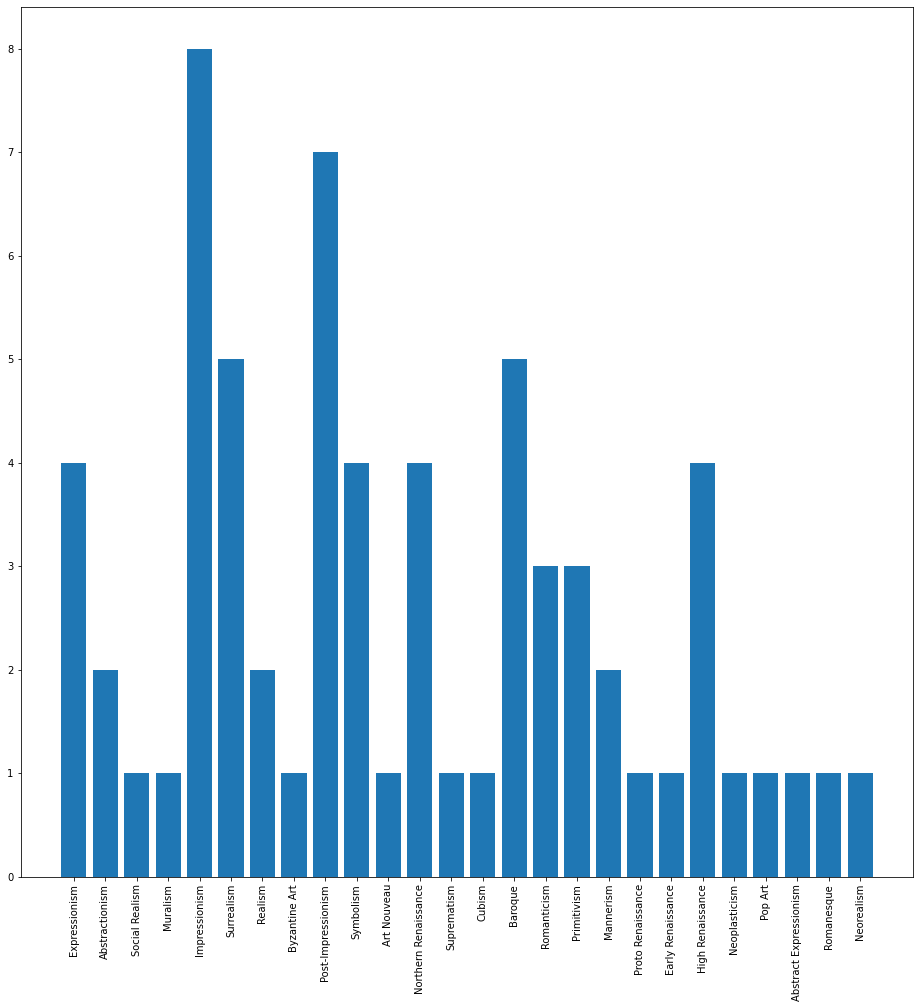

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('artists_mba21.csv')
genre_count = {}
for genre in df['genre']:
    current_genres = genre.split(',')
    for current_genre in current_genres:
        if (current_genre not in genre_count):
            genre_count[current_genre] = 0
        genre_count[current_genre] += 1
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
plt.bar(x=list(genre_count.keys()), height = list(genre_count.values()))

plt.xticks(x=list(genre_count.keys()), rotation='vertical')

#### 3.b (1.0 ponto)

Trate a coluna "paintings", a qual deveria conter apenas atributos numéricos inteiros. Siga os seguintes passos:
1. Exiba os valores não convertíveis para númerico
2. Converta a coluna para o tipo inteiro de forma que não haja dados perdidos/faltantes

Após o tratamento exiba a estatística descritiva da coluna tratada usando `describe()`

Dica: há várias soluções possíveis, mas usar expressões regulares pode ser útil nesse caso. Por exemplo a expressão `'(\d+)'` extrai apenas dígitos

In [32]:
# visualize records where painting is not a parsable numeric
def get_non_parsable_index(dataframe: pd.DataFrame, fld: str) -> pd.Index:
    return df.loc[~dataframe[fld].astype(str).str.isnumeric()].index

PAINTINGS_FLD = 'paintings'
non_parsable_paintings_index = get_non_parsable_index(df, PAINTINGS_FLD)
print(df.loc[non_parsable_paintings_index, :])

                 name        years                    genre nationality  \
2        Diego Rivera  1886 - 1957  Social Realism,Muralism     Mexican   
9        Gustav Klimt  1862 - 1918    Symbolism,Art Nouveau    Austrian   
43      Piet Mondrian  1872 – 1944            Neoplasticism       Dutch   
50   Master of Pedret  1100 – 1130               Romanesque     Spanish   
51  Candido Portinari  1903 – 1962               Neorealism   Brazilian   

                                                  bio  \
2   Diego María de la Concepción Juan Nepomuceno E...   
9   Gustav Klimt (July 14, 1862 – February 6, 1918...   
43  Pieter Cornelis Mondriaan, after 1906 Piet Mon...   
50  Master of Pedret is the name given by historia...   
51  Candido Portinari (December 29, 1903 – Februar...   

                                          wikipedia paintings  
2         http://en.wikipedia.org/wiki/Diego_Rivera       70)  
9         http://en.wikipedia.org/wiki/Gustav_Klimt     "117"  
43      https:

In [47]:
import re

expreg = '\d+'
prog = re.compile(expreg)
new_df = df.copy()
for i in non_parsable_paintings_index:
    paintings = new_df.loc[i, PAINTINGS_FLD]
    result = prog.findall(paintings)
    if (len(result) != 0):
        new_df.loc[i, PAINTINGS_FLD] = result[0]
new_df.loc[new_df[PAINTINGS_FLD] == 'three', PAINTINGS_FLD] = 3

# vizualize records where 'paintings' is NaN after clean up:
non_parsable_paintings_index2 = get_non_parsable_index(new_df, PAINTINGS_FLD)
print(new_df.loc[non_parsable_paintings_index2, :])

Empty DataFrame
Columns: [name, years, genre, nationality, bio, wikipedia, paintings]
Index: []


In [48]:
new_df[PAINTINGS_FLD] = pd.to_numeric(new_df[PAINTINGS_FLD], downcast='integer', errors='coerce')
print(new_df.dtypes)

name           object
years          object
genre          object
nationality    object
bio            object
wikipedia      object
paintings       int16
dtype: object


In [49]:
new_df.describe()

,paintings
count,53.000000
mean,160.433962
std,156.816589
min,3.000000
25%,70.000000
50%,119.000000
75%,188.000000
max,877.000000


### Questão 4 (2.5 pontos)

Dada uma imagem `query.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares de acordo com suas cores. Para isso utilizaremos um descritor baseado em cores conhecido por **Border-Interior Classification (BIC)**

> Stehling, R. O., Nascimento, M. A., & Falcão, A. X. (2002). A compact and efficient image retrieval approach based on border/interior pixel classification. In Proceedings of the eleventh international conference on Information and knowledge management (pp. 102-109). 

O BIC funciona da seguinte forma:

1. Transforma a imagem em um único canal de cores
2. Reescala o número de cores da imagem para $C$ cores
3. Computa dois histogramas de cor na imagem:
   1. Para os pixels considerados "interior", cuja cor seja igual à dos 4 vizinhos (cima, baixo, direita e esquerda)
   2. Para todos os pixels da imagem, considerados de "borda". Aqui também entram os pixels na extremidade da imagem (ou seja as primeiras e últimas linhas/colunas)
4. Normaliza cada histograma, concatena os histogramas em um único vetor e normaliza novamente o vetor concatenado
   
Exemplo seja a matriz abaixo uma imagem com $C=4$, ou seja, com cores 0, 1, 2 e 3:

|||||||
|-|-|-|-|-|-|
|3|3|3|2|2|0|
|3|**3**|3|2|**2**|2|
|3|**3**|3|2|**2**|2|
|3|**3**|**3**|3|2|2|
|0|3|3|1|2|0|

Os valores em negrito correspondem à cores "interior" e o restante de "borda". 

Assim, teríamos o seguintes histogramas:<br>
`h_borda = [3,1,9,11]`<br>
`h_inter = [0,0,2,4]`

Note que cada vetor representa as frequências, em ordem, das cores 0, 1, 2 e 3. Por exemplo, há 3 pixels da cor 0 referentes à borda, há 2 pixels da cor 2 referentes a interior.

Após computar os histogramas, é preciso normalizá-los para evitar problemas com imagens de diferentes resoluções. Diferentes métodos podem ser utilizados. Aqui utilizaremos a *normalização L1*, dividindo os elementos pela soma absoluta do vetor, resultando em:<br>
`h_borda_nr = [0.125,  0.0417, 0.375, 0.4583]`<br>
`h_inter_nr = [0.000,  0.0000, 0.333, 0.6667]`<br>

Assim, para uma determinada imagem com $C$ cores, o vetor de características terá $2\cdot C$ dimensões, relativas aos 2 histogramas concatenados. Após a concatenação normalizamos novamente:<br>
`bic_norm = [0.0625, 0.0208, 0.1875, 0.2292, 0.0000, 0.0000, 0.1667, 0.3333]`

Esse será o vetor de características final a ser utilizado

---
Use o descritor BIC com $C=32$ para as imagens disponibilizadas. Use a função disponibilizada `rescale_image_colors()` para reescalar a imagem.

Faça uma busca no diretório `paintings21`, retornando as 5 imagens mais similares a `query.jpg` de acordo com o descritor BIC e a distância Euclidiana. Exiba a imagem de consulta, e também as 5 imagens retornadas, com seus nomes e valores da distância obtidos.

In [7]:
# inclua aqui as bibliotecas e funções 
# inclua os pacotes necessários e as funções necessárias
from skimage import feature
from os import listdir
import imageio
import matplotlib.pyplot as plt

def rescale_image_colors(img, n_colors=32):
    # RGB para escala de cinza usando Luma Rec.709
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.0772
        
    # reescalando numero de cores
    img = img/255.0
    img = (img*(n_colors-1)).astype(np.uint8)
    return img

In [8]:
# inclua o código relativo ao descritor BIC e para extração de características das imagens

In [9]:
# query
imgQ = imageio.imread("paintings21/query.jpg")

l_imgs = listdir('./paintings21/')
n_imgs = len(l_imgs)

# percorre imagens
for im in l_imgs:
    imgS = imageio.imread('./paintings21/'+im)
    print('\r Processando: %s          ' % (im), end='')

 Processando: William_Turner_1.jpg          

In [10]:
# inclua o código para obter e visualizar as 5 imagens mais próximas com base nas distâncias computadas e exibi-las